In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def L(lam):
    return 3*lam-30*np.log(lam)+45.96

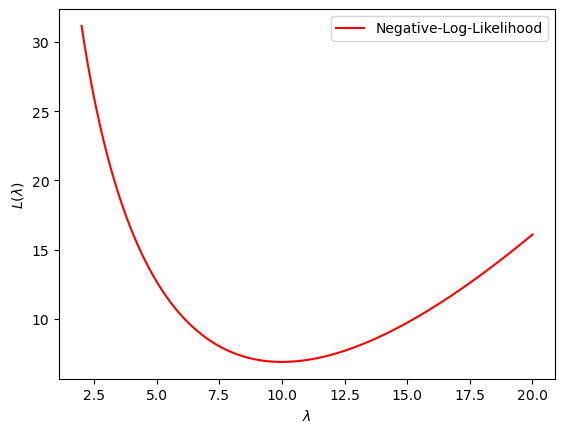

In [3]:
#a)
x = np.linspace(2,20,1000)
plt.plot(x,L(x), label="Negative-Log-Likelihood", color="red")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$L(\lambda)$")
plt.legend()

The lower bounds are:  [8.28363715099925, 6.778764881271101, 5.473703487747281]
The upper bounds are:  [11.938502804140752, 14.108809952902524, 16.519662376045215]


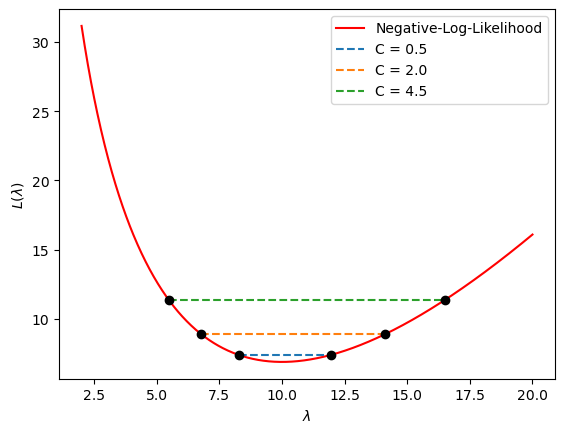

In [4]:
#c)
from scipy.optimize import root

C = np.array([1/2, 2, 9/2])
plt.plot(x,L(x), label="Negative-Log-Likelihood", color="red")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$L(\lambda)$")

solution_lower = []
solution_upper = []
def f(lam, C):
    return L(lam) - L(10) - C
for c in C:
    sol = root(lambda lam: f(lam,c), x0 = [10-4, 10+4])
    solution_lower.append(sol.x[0] if sol.success else print("Error"))
    solution_upper.append(sol.x[1] if sol.success else print("Error"))
print("The lower bounds are: ", solution_lower)
print("The upper bounds are: ", solution_upper)
for i in range(len(C)):
    plt.plot([solution_lower[i], solution_upper[i]], [L(10)+C[i], L(10)+C[i]], label="C = "+str(C[i]), linestyle="dashed")
    plt.plot(solution_lower[i], L(10)+C[i], 'o', color="black")
    plt.plot(solution_upper[i], L(10)+C[i], 'o', color="black")
plt.legend()

Streuung um Schätzung $\lambda = 10$ ?!

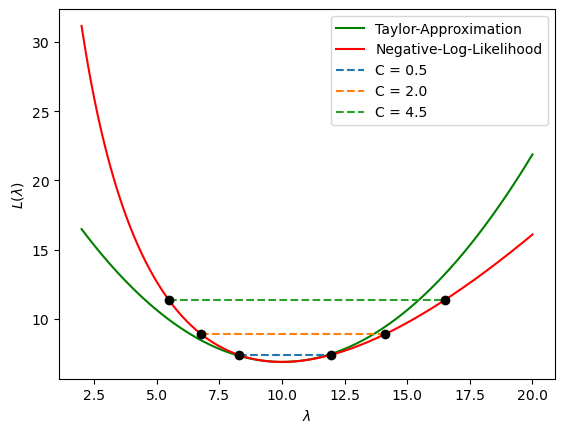

In [5]:
def taylor(lam):
    return L(10) + 3/20*(lam-10)**2
plt.plot(x,taylor(x), label="Taylor-Approximation", color="green")
plt.plot(x,L(x), label="Negative-Log-Likelihood", color="red")
for i in range(len(C)):
    plt.plot([solution_lower[i], solution_upper[i]], [L(10)+C[i], L(10)+C[i]], label="C = "+str(C[i]), linestyle="dashed")
    plt.plot(solution_lower[i], L(10)+C[i], 'o', color="black")
    plt.plot(solution_upper[i], L(10)+C[i], 'o', color="black")
plt.xlabel(r"$\lambda$")
plt.ylabel(r"$L(\lambda)$")
plt.legend()

Die Werte aus c müssen nicht numerisch ermittelt werden -> wird aber dadurch ungenauer (siehe plot)
Je weiter man von der Entwicklungsstelle weggeht, desto ungenauer...